# Forecasting using Time Series

Using time-series to predict the future is a crucial application. 
In *hard* applications, such as predicting the stock market, one can use the full power of Machine Learning ({numref}`sec:machine_learning`) and still be unsuccessful.
However, in some applications one can fit a trendline to the data and obtain a useful prediction, at least for a short period of time.
Since we have not yet learned how to make trendlines, we will use tools to do them for us and only deal with them visually. 

As an example, we first load a dataset with number of passengers flying each month from 1949 to 1960.

In [3]:
%matplotlib inline
import seaborn as sns
flights = sns.load_dataset("flights") 
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


Looking at this plot, it seems reasonable that we could predict the average number of monthly passengers in the future by following the trendline. 

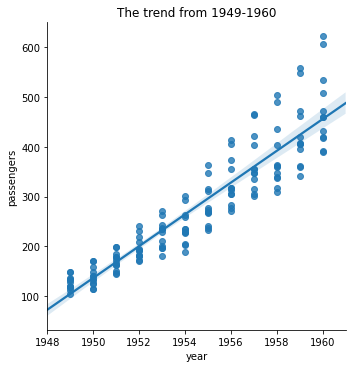

In [14]:
sns.lmplot(x="year",y="passengers",data=flights,truncate=False,facet_kws={'xlim':(1948,1961)})
plt.title("The trend from 1949-1960");

To test this idea, we can try using the data from 1949-1958 to predict the average monthly passengers in 1960. 
This looks pretty good. 

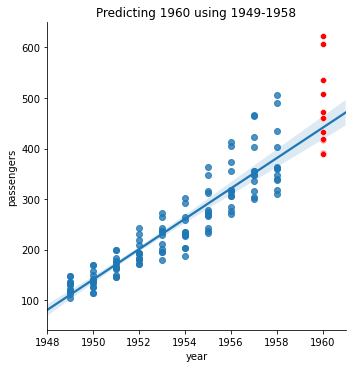

In [13]:
sns.lmplot(x="year",y="passengers",data=flights[flights['year']<1959],truncate=False,facet_kws={'xlim':(1948,1961)})
sns.scatterplot(x="year",y="passengers",data=flights[flights['year']==1960],color='red')
plt.title("Predicting 1960 using 1949-1958");

However, if we try to predict far in the future, our forecast is no longer any good.
Here is what happens if we only use 1949-1952 to predict 1960.

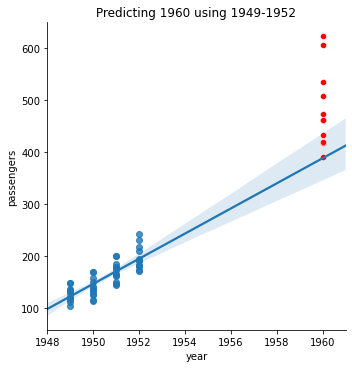

In [12]:
sns.lmplot(x="year",y="passengers",data=flights[flights['year']<1953],truncate=False,facet_kws={'xlim':(1948,1961)})
sns.scatterplot(x="year",y="passengers",data=flights[flights['year']==1960],color='red')
plt.title("Predicting 1960 using 1949-1952");

```{admonition} Thinking Questions
:class: important
* Why does predicting far into the future not work very well?
* How far is too far?
```
